In [1]:
# make sure here while selecting the kernel, choose the vnev we created - mlrebit in this case
# this notebook is for EDA purposes

In [2]:
import pandas as pd
import numpy as np


wine = pd.read_csv("winequality-red.csv")

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
misspercentage = (wine.isnull().sum()/(wine.shape[0]*100))

misspercentage

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [13]:
for cols in wine.columns:
    """for every column checking min and max to get an idea of range/scale"""
    max_val = wine[cols].max()
    min_val = wine[cols].min()
    print(f"{cols}, Max: {max_val}, Min: {min_val}")

fixed acidity, Max: 15.9, Min: 4.6
volatile acidity, Max: 1.58, Min: 0.12
citric acid, Max: 1.0, Min: 0.0
residual sugar, Max: 15.5, Min: 0.9
chlorides, Max: 0.611, Min: 0.012
free sulfur dioxide, Max: 72.0, Min: 1.0
total sulfur dioxide, Max: 289.0, Min: 6.0
density, Max: 1.00369, Min: 0.99007
pH, Max: 4.01, Min: 2.74
sulphates, Max: 2.0, Min: 0.33
alcohol, Max: 14.9, Min: 8.4
quality, Max: 8, Min: 3


In [14]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='alcohol'>

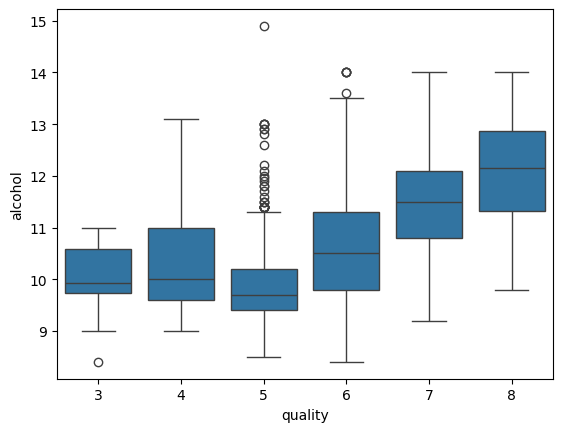

In [17]:
import seaborn as sns
# Box plot
sns.boxplot(x='quality', y='alcohol', data=wine)


<Axes: >

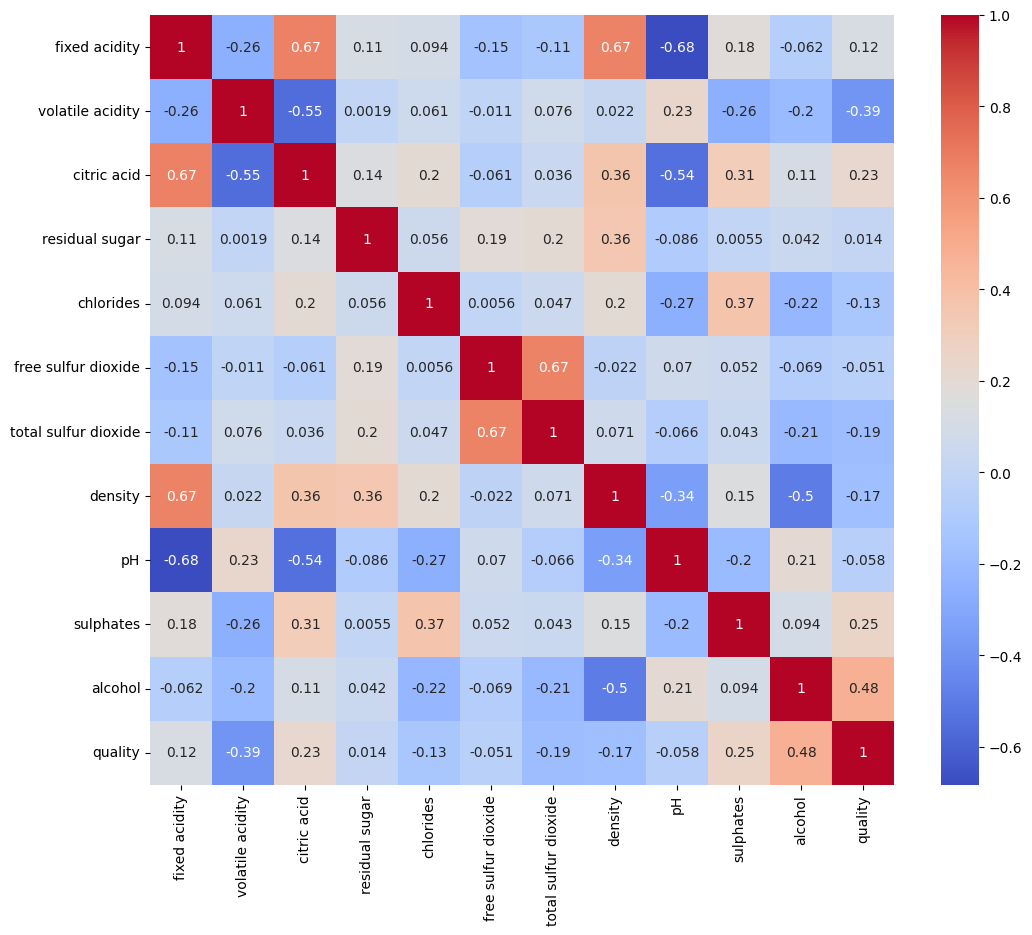

In [20]:
# Correlation heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10)) 
corr = wine.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


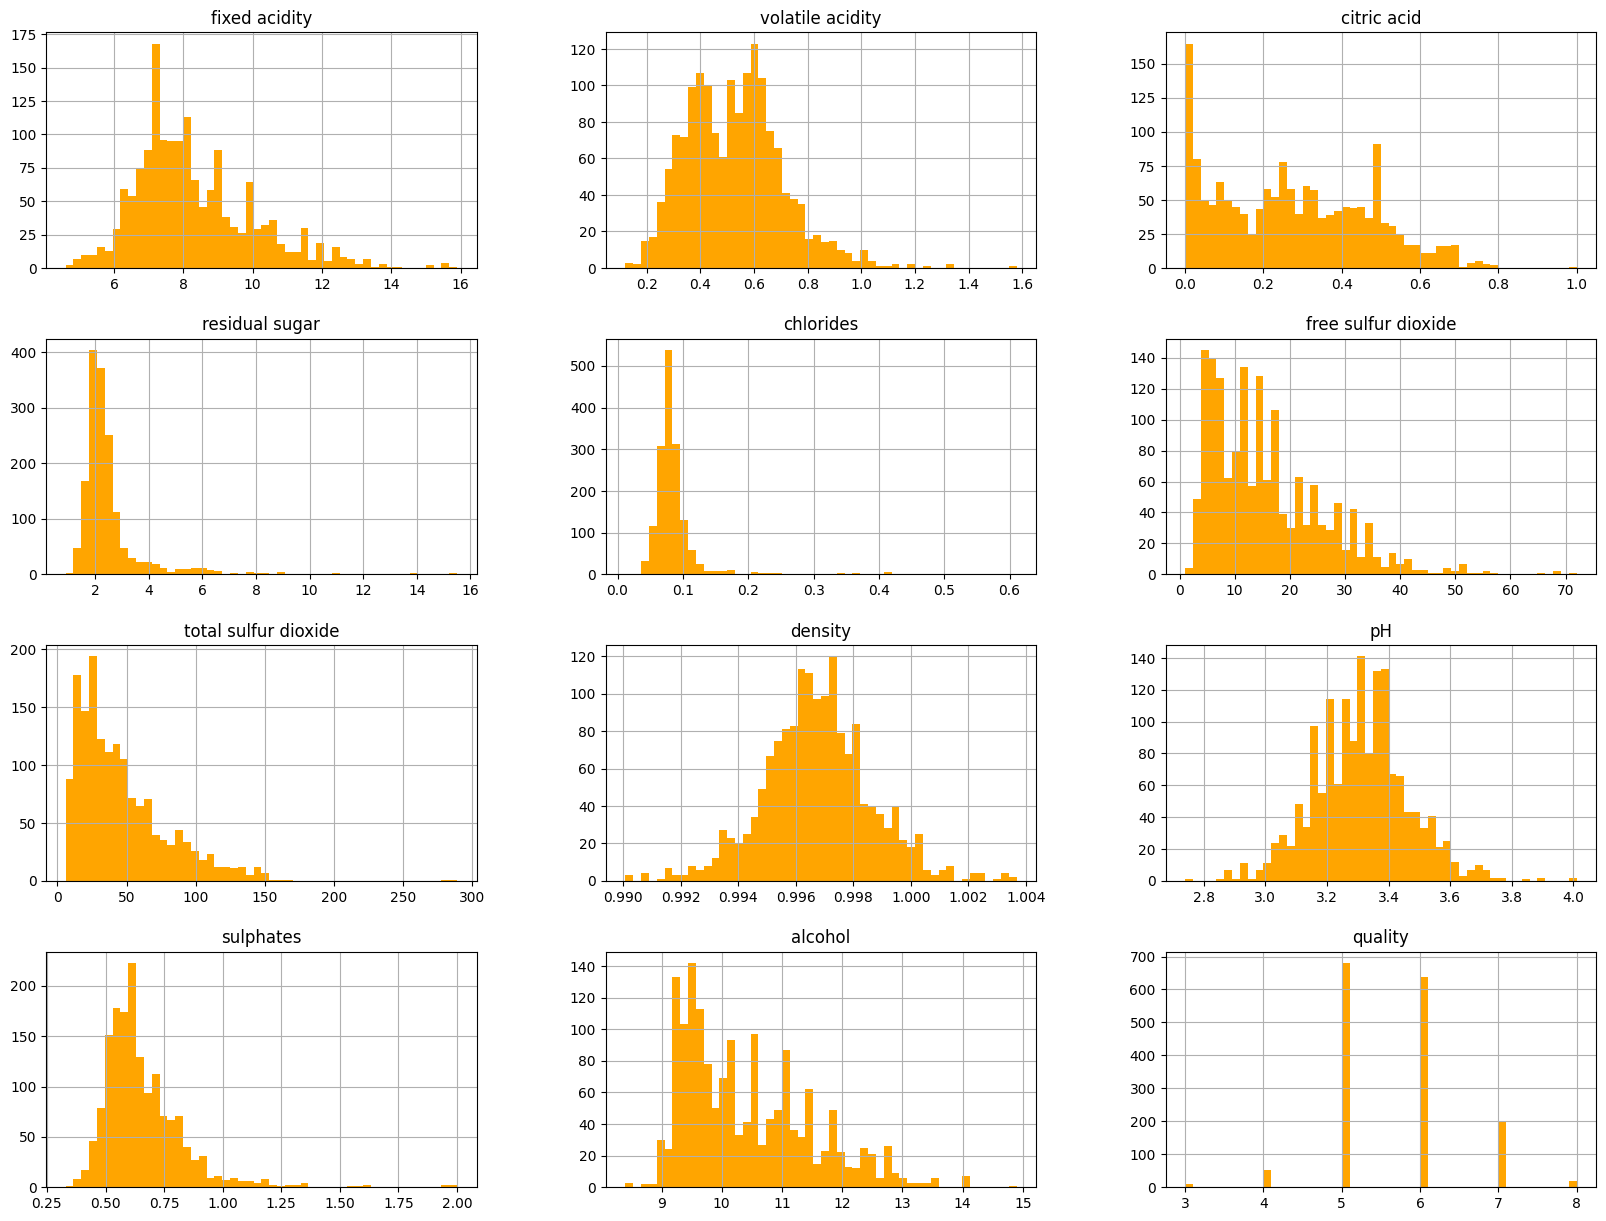

In [22]:
import matplotlib.pyplot as plt 

wine.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

In [24]:
wine.groupby('quality').agg(['min','max','mean'])

fixed acidity                 volatile acidity                   \
                  min   max      mean              min    max      mean   
quality                                                                   
3                 6.7  11.6  8.360000             0.44  1.580  0.884500   
4                 4.6  12.5  7.779245             0.23  1.130  0.693962   
5                 5.0  15.9  8.167254             0.18  1.330  0.577041   
6                 4.7  14.3  8.347179             0.16  1.040  0.497484   
7                 4.9  15.6  8.872362             0.12  0.915  0.403920   
8                 5.0  12.6  8.566667             0.26  0.850  0.423333   

        citric acid                 residual sugar  ...   density    pH        \
                min   max      mean            min  ...      mean   min   max   
quality                                             ...                         
3              0.00  0.66  0.171000            1.2  ...  0.997464  3.16  3.63   
4              0.00  1.00  0.174151            1.3  ...  0.996542  2.74  3.90   
5              0.00  0.79  0.243686            1.2  ...  0.997104  2.88  3.74   
6              0.00  0.78  0.273824            0.9  ...  0.996615  2.86  4.01   
7              0.00  0.76  0.375176            1.2  ...  0.996104  2.92  3.78   
8              0.03  0.72  0.391111            1.4  ...  0.995212  2.88  3.72   

                  sulphates                 alcohol                   
             mean       min   max      mean     min   max       mean  
quality                                                               
3        3.398000      0.40  0.86  0.570000     8.4  11.0   9.955000  
4        3.381509      0.33  2.00  0.596415     9.0  13.1  10.265094  
5        3.304949      0.37  1.98  0.620969     8.5  14.9   9.899706  
6        3.318072      0.40  1.95  0.675329     8.4  14.0  10.629519  
7        3.290754      0.39  1.36  0.741256     9.2  14.0  11.465913  
8        3.267222      0.63  1.10  0.767778     9.8  14.0  12.094444  

[6 rows x 33 columns]

In [23]:
# after this you can perform all the exploration techniques
# if you look closely certain cols are skewed you can get rid of skewness using log transformation etc

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
X = wine.drop(['quality'], axis=1) # all cols except quality
y = wine['quality'] # target feature

In [26]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [27]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


"""

Elastic Net regression is a regularized linear regression method that combines both L1 (Lasso) and L2 (Ridge) penalties. It's designed to address some of the limitations of Lasso and Ridge regression individually.

Understanding the Problem: Multicollinearity and Feature Selection

Multicollinearity: This occurs when several predictor variables (features) in your dataset are highly correlated. It can make it difficult to isolate the individual effect of each predictor on the target variable. In simple terms, it's like trying to figure out which ingredient in a cake is most important for taste when you always add them together in the same proportions.

Feature Selection: In many datasets, not all features are equally important. Some might be irrelevant or redundant. Feature selection aims to identify the most important features and exclude less important ones. This simplifies the model, improves interpretability, and can reduce overfitting.

Lasso (L1 Regularization):

Lasso adds a penalty term to the ordinary least squares (OLS) loss function that's proportional to the absolute values of the regression coefficients.

This penalty encourages some of the coefficients to become exactly zero, effectively performing feature selection. It "shrinks" less important coefficients to zero, leaving only the most relevant features in the model.

Ridge (L2 Regularization):

Ridge regression adds a penalty term proportional to the square of the regression coefficients.

It doesn't force coefficients to zero but shrinks them towards zero. This helps to reduce the impact of multicollinearity by distributing the weights among correlated features.

Elastic Net: The Best of Both Worlds

Elastic Net combines the penalties of both Lasso and Ridge regression:

Loss = OLS Loss + α * [(1 - ρ) * L2 penalty + ρ * L1 penalty]

α (alpha): Controls the overall strength of regularization. Higher alpha means more regularization (more shrinking of coefficients).

ρ (rho or l1_ratio): Controls the mix between L1 and L2 penalties.

ρ = 0: Ridge regression.

ρ = 1: Lasso regression.

0 < ρ < 1: A mix of both.

Advantages of Elastic Net:

Handles Multicollinearity: Like Ridge, it can handle highly correlated predictors.

Performs Feature Selection: Like Lasso, it can shrink some coefficients to zero, leading to a more sparse and interpretable model.

Group Effect: When highly correlated features are present, Elastic Net tends to select or exclude them together (the "group effect"), which can be desirable in some situations. Lasso might arbitrarily choose one correlated feature over another.

When to Use Elastic Net:

When you have a dataset with many features, some of which might be irrelevant or redundant.

When you suspect multicollinearity among your predictor variables.

When you want a balance between feature selection and handling multicollinearity. If you primarily need feature selection, Lasso might be sufficient. If multicollinearity is the main concern, Ridge might be a better choice.

In simple terms: Imagine you're trying to build a house (your model) using various materials (features). Elastic Net helps you decide which materials are essential (Lasso – feature selection), while ensuring that you don't rely too heavily on any single material if others can serve a similar purpose (Ridge – handling multicollinearity). The alpha parameter controls how strict you are about using fewer materials, and the l1_ratio determines how much you prioritize using only the essentials versus balancing the use of similar materials.


"""

In [31]:
from sklearn.linear_model import ElasticNet

In [33]:
lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(X_train, y_train)

#  Elastic Net regression is a type of linear regression that includes regularization terms to prevent overfitting (making the model too complex and
# fitting the training data too closely, leading to poor performance on new data).

# alpha=0.1: This is a hyperparameter that controls the overall strength of the regularization. A higher alpha means stronger regularization.
# Regularization helps to simplify the model and improve generalization to unseen data.

# l1_ratio=0.5: This hyperparameter controls the mix between L1 and L2 regularization. 
# Elastic Net combines both L1 (Lasso) and L2 (Ridge) regularization. 
# An l1_ratio of 0 is equivalent to Ridge regression, and an l1_ratio of 1 is equivalent to Lasso regression. 
# A value of 0.5 means it's a 50/50 mix.

# lr.fit() : it learns the relationship between the features (X_train) and the target variable (y_train).


ElasticNet(alpha=0.1, random_state=42)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [35]:
def eval_metrics(actual, pred):
    "rmse : root mean sqaured error, mae:mean absolute eror, r2 : R squared value"
    rmse = np.sqrt(mean_squared_error(actual, pred)) # give actual and pred
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred) 

    return rmse, mae, r2

In [36]:
predicted_value = lr.predict(X_test) # prediction for test data and store it 

In [37]:
predicted_value # print the pedicted values

array([5.34821386, 5.14896267, 5.65056119, 5.53134648, 5.6652817 ,
       5.31972154, 5.03292294, 5.50873493, 5.46865651, 5.7321401 ,
       6.17879618, 5.47822529, 5.40776951, 5.29953678, 5.32254971,
       6.26441114, 5.31883929, 5.54649991, 6.0889127 , 5.32779967,
       5.76312796, 5.23315755, 6.06237923, 6.26824384, 5.48723822,
       5.35858014, 6.26274559, 5.51911137, 5.18391149, 5.69289577,
       5.33658209, 5.40301702, 5.42559935, 5.64112785, 5.46917091,
       5.15366879, 5.82333453, 5.63271619, 5.80577391, 5.96233672,
       5.70058967, 5.20610579, 5.79293927, 5.16865732, 5.49225571,
       5.68494401, 5.8633667 , 5.51850914, 5.67063273, 5.6147086 ,
       5.07550905, 5.16986105, 5.82211161, 6.00371098, 5.10341096,
       5.03471506, 5.85987335, 5.43017099, 5.75744542, 5.40386094,
       5.45724505, 5.80040573, 5.24365824, 5.23383276, 6.27133178,
       5.32525654, 6.15615222, 5.34575877, 6.0306709 , 5.32477447,
       6.25703864, 5.15638565, 5.37476237, 5.82430382, 6.10609

In [38]:
(rmse, mae, r2) = eval_metrics(y_test, predicted_value)
# give predicted values to evaluation metrics by calling the function
# y_test is actual data and predicted_value are the predicted ones

In [39]:
print("rmse = ", rmse)
print("mae = ", mae)
print("r2 = ", r2)

rmse =  0.6985911523308714
mae =  0.5590548688059019
r2 =  0.25321312561494613
